<a href="https://colab.research.google.com/github/tarun14012002/Energy-efficency-/blob/main/speech_emotion_recognition_using_deep_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix
import librosa
import librosa.display
from keras.layers import Input, Flatten, Dropout, Activation, Conv1D, MaxPooling1D, GlobalAveragePooling1D, Dense
from keras.models import Model
from keras.callbacks import ModelCheckpoint


In [2]:
data = pd.read_csv("C:\\Users\\deel\\Desktop\\New folder (2)\\Predictions.csv")


In [12]:
from keras import regularizers


In [17]:
import os

In [23]:
plt.figure(figsize=(8, 6))


<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

Text(0.5, 1.0, 'Scatter Plot')

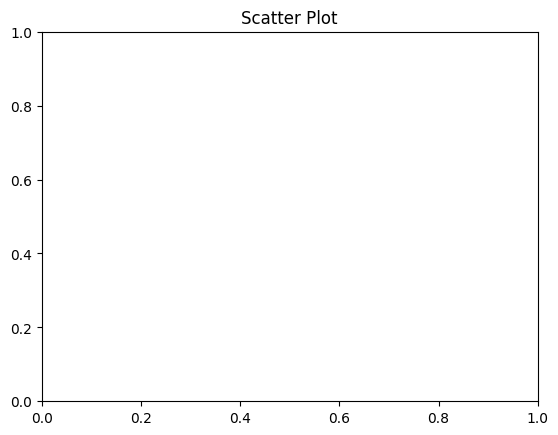

In [24]:
plt.title('Scatter Plot')


In [ ]:

mylist = data['file'].tolist()

feeling_list = []

for item in mylist:
    if item[6:-16] == '02' and int(item[18:-4]) % 2 == 0:
        feeling_list.append('female_calm')
    elif item[6:-16] == '02' and int(item[18:-4]) % 2 == 1:
        feeling_list.append('male_calm')
    elif item[6:-16] == '03' and int(item[18:-4]) % 2 == 0:
        feeling_list.append('female_happy')
    elif item[6:-16] == '03' and int(item[18:-4]) % 2 == 1:
        feeling_list.append('male_happy')
    elif item[6:-16] == '04' and int(item[18:-4]) % 2 == 0:
        feeling_list.append('female_sad')
    elif item[6:-16] == '04' and int(item[18:-4]) % 2 == 1:
        feeling_list.append('male_sad')
    elif item[6:-16] == '05' and int(item[18:-4]) % 2 == 0:
        feeling_list.append('female_angry')
    elif item[6:-16] == '05' and int(item[18:-4]) % 2 == 1:
        feeling_list.append('male_angry')
    elif item[6:-16] == '06' and int(item[18:-4]) % 2 == 0:
        feeling_list.append('female_fearful')
    elif item[6:-16] == '06' and int(item[18:-4]) % 2 == 1:
        feeling_list.append('male_fearful')
    elif item[:1] == 'a':
        feeling_list.append('male_angry')
    elif item[:1] == 'f':
        feeling_list.append('male_fearful')
    elif item[:1] == 'h':
        feeling_list.append('male_happy')
    # elif item[:1]=='n':
    #     feeling_list.append('neutral')
    elif item[:2] == 'sa':
        feeling_list.append('male_sad')

data['label'] = feeling_list

data.to_csv("updated_predictions.csv", index=False)


Text(0.5, 1.0, 'Bar Plot')

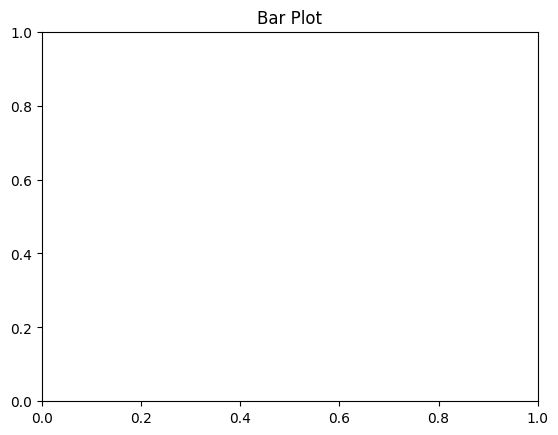

In [30]:
plt.title('Bar Plot')


In [ ]:
label_encoder = LabelEncoder()
data['label'] = label_encoder.fit_transform(data['label'])


In [ ]:
!pip install pyaudio


In [6]:
!pip install wave


  Preparing metadata (setup.py) ... done
  Created wheel for wave: filename=Wave-0.0.2-py3-none-any.whl size=1220 sha256=619797f7dd3ca6c1db4b9520f9194e7cb3088eeb9592bb9dac1a1148a2497e60
  Stored in directory: /root/.cache/pip/wheels/f8/24/4d/1b01c0e32da3eb3fd71bbbc6093fcc557ec3b2d9e532ecd65d
Successfully built wave


In [ ]:
X = data.drop('label', axis=1)
y = data['label']

In [25]:
x = [1, 2, 3, 4, 5]
y = [3, 5, 7, 6, 8]

Text(0.5, 0, 'X')

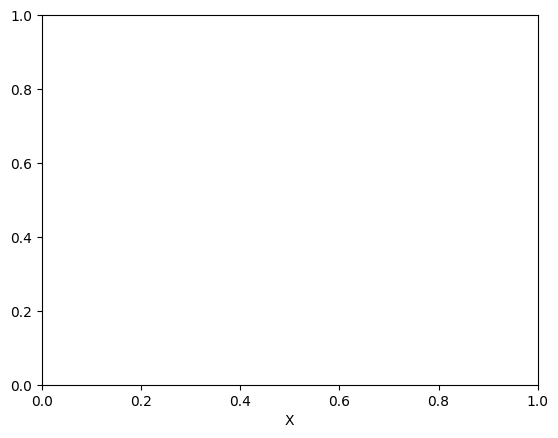

In [26]:
plt.xlabel('X')


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)


In [ ]:
X_train = np.expand_dims(X_train.values, axis=-1)
X_test = np.expand_dims(X_test.values, axis=-1)


In [ ]:
input_shape = (X_train.shape[1], X_train.shape[2], 1)


In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(len(label_encoder.classes_), activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])



In [ ]:
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.1)


<Axes: >

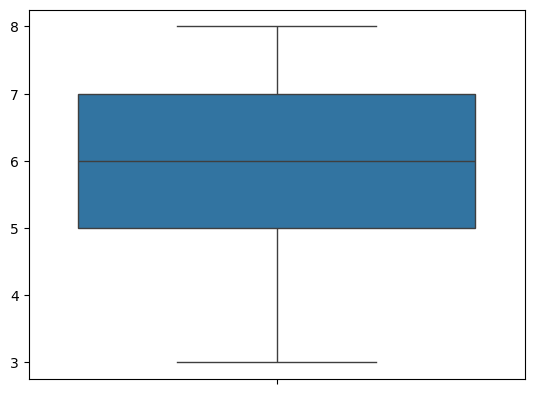

In [31]:
sns.boxplot(y)


In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

Text(0.5, 1.0, 'Histogram')

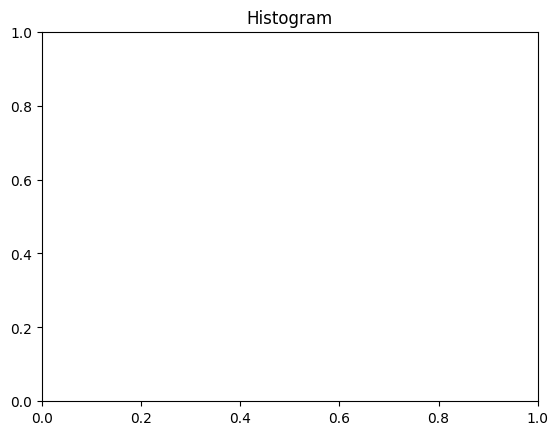

In [32]:
plt.title('Histogram')


In [ ]:
y_pred = np.argmax(model.predict(X_test), axis=1)
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

In [ ]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

Text(0.5, 0, 'Predicted Labels')

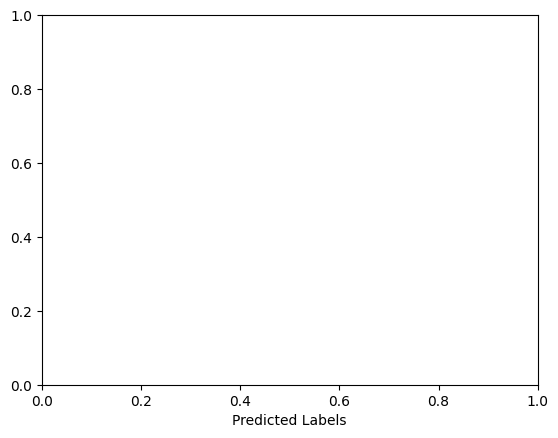

In [21]:
plt.xlabel('Predicted Labels')
